# **Mental Health:** Understanding the Factors that Affect Mental Health

**Data Loading & Cleaning**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv('/content/mental_health_dataset.csv')
df.shape

(238747, 17)

In [35]:
df.head()

,Timestamp,Gender,Country,Occupation,Self_Employed,Family_History,Treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,Mental_Health_Interview,Care_Options
3,2014-08-27 11:37:59,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,2014-08-27 11:43:36,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
5,2014-08-27 11:49:51,Female,Poland,Corporate,No,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Not sure
6,2014-08-27 11:51:34,Female,Australia,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
7,2014-08-27 11:52:41,Female,United States,Corporate,No,No,No,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No


In [22]:
column_mapping = {
    'self_employed': 'Self_Employed',
    'family_history': 'Family_History',
    'mental_health_interview':'Mental_Health_Interview',
    'care_options': 'Care_Options',
    'treatment': 'Treatment'
}
df.rename(columns=column_mapping, inplace=True)

In [23]:
df.isna().any()

Timestamp                  False
Gender                     False
Country                    False
Occupation                 False
Self_Employed               True
Family_History             False
Treatment                  False
Days_Indoors               False
Growing_Stress              True
Changes_Habits              True
Mental_Health_History       True
Mood_Swings                 True
Coping_Struggles            True
Work_Interest               True
Social_Weakness             True
Mental_Health_Interview     True
Care_Options                True
dtype: bool

In [20]:
df['Occupation'].unique()

array(['Corporate', 'Student', 'Business', 'Housewife', 'Others'],
      dtype=object)

In [32]:
df = df.dropna()

In [33]:
df.isna().any()

Timestamp                  False
Gender                     False
Country                    False
Occupation                 False
Self_Employed              False
Family_History             False
Treatment                  False
Days_Indoors               False
Growing_Stress             False
Changes_Habits             False
Mental_Health_History      False
Mood_Swings                False
Coping_Struggles           False
Work_Interest              False
Social_Weakness            False
Mental_Health_Interview    False
Care_Options               False
dtype: bool

In [40]:
df.isnull().any()

Timestamp                  False
Gender                     False
Country                    False
Occupation                 False
Self_Employed              False
Family_History             False
Treatment                  False
Days_Indoors               False
Growing_Stress             False
Changes_Habits             False
Mental_Health_History      False
Mood_Swings                False
Coping_Struggles           False
Work_Interest              False
Social_Weakness            False
Mental_Health_Interview    False
Care_Options               False
dtype: bool

In [36]:
df.drop_duplicates(inplace = True)
df.shape

(234060, 17)

In [38]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
df.head()

,Timestamp,Gender,Country,Occupation,Self_Employed,Family_History,Treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,Mental_Health_Interview,Care_Options
3,2014-08-27 11:37:59,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,2014-08-27 11:43:36,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
5,2014-08-27 11:49:51,Female,Poland,Corporate,No,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Not sure
6,2014-08-27 11:51:34,Female,Australia,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
7,2014-08-27 11:52:41,Female,United States,Corporate,No,No,No,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No


**Data Calculation & Visualization**

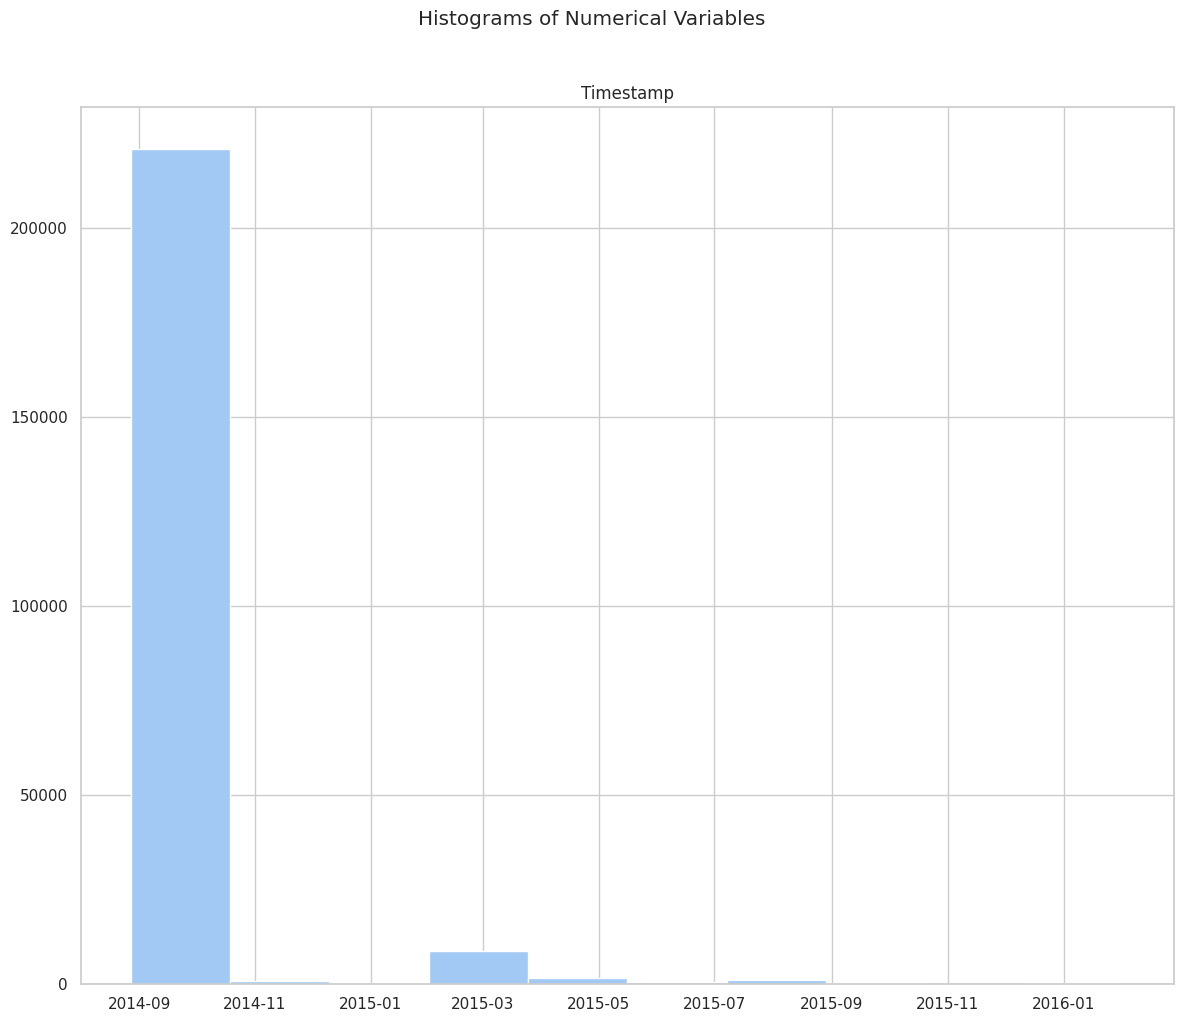

In [52]:
sns.set(style='whitegrid', palette='pastel')

# Histogram for numerical variables
plt.figure(figsize=(12, 10))
df.hist(ax=plt.gca())
plt.suptitle('Histograms of Numerical Variables', y=1.02)
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

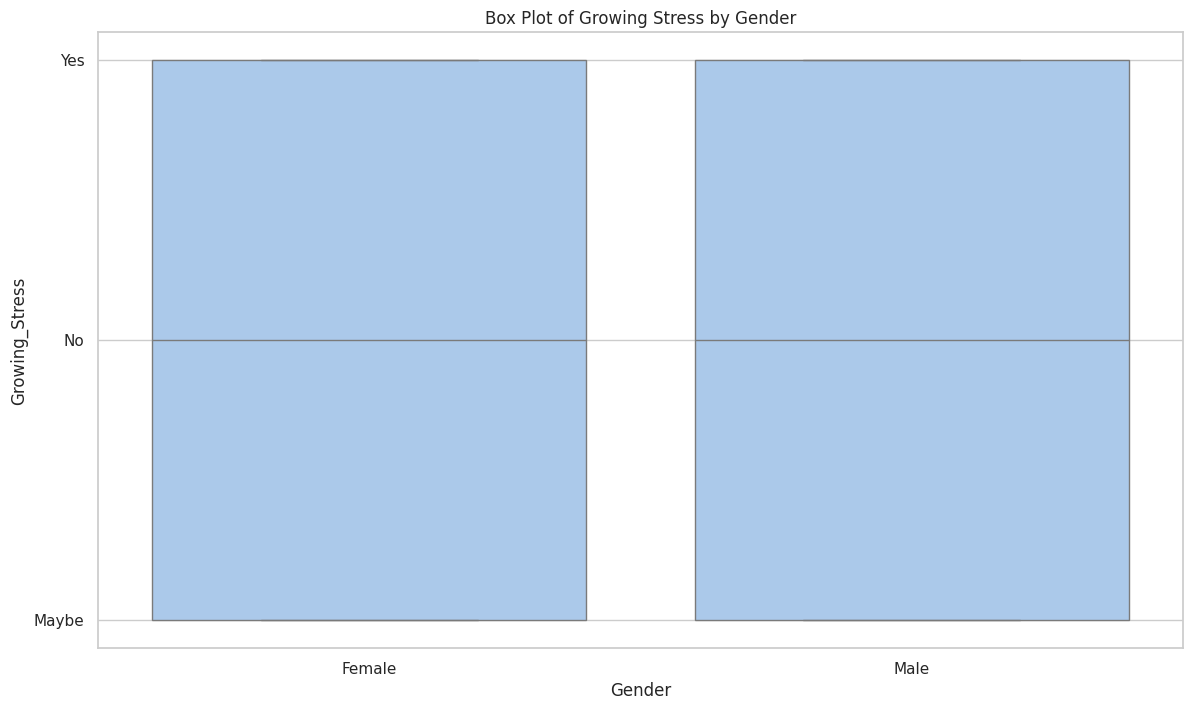

In [53]:
sns.set(style='whitegrid', palette='pastel')

# Box Plot of Growing Stress by Gender
plt.figure(figsize=(14, 8))
sns.boxplot(x='Gender', y='Growing_Stress', data=df)
plt.title('Box Plot of Growing Stress by Gender')
plt.show()


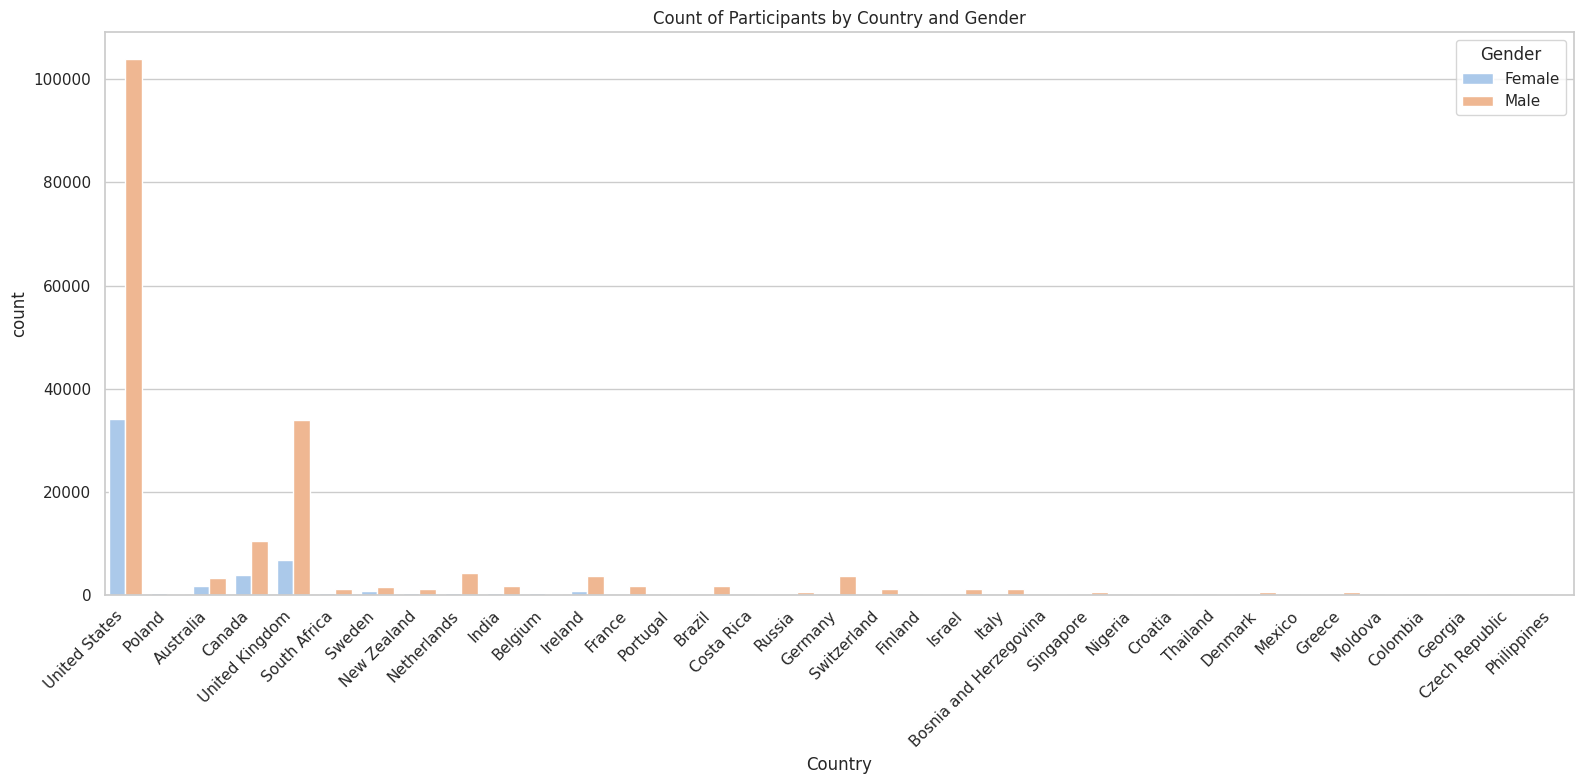

In [54]:
sns.set(style='whitegrid', palette='pastel')

# Gender and Country Analysis
plt.figure(figsize=(16, 8))
sns.countplot(x='Country', hue='Gender', data=df)
plt.title('Count of Participants by Country and Gender')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


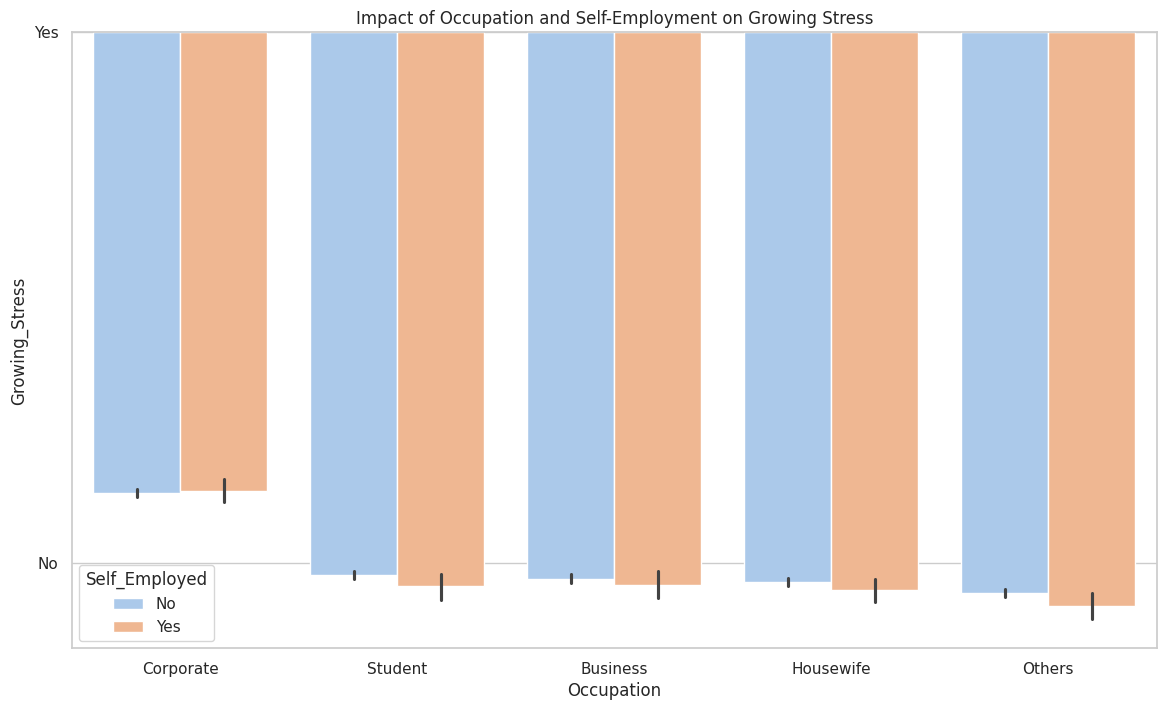

In [58]:
sns.set(style='whitegrid', palette='pastel')

# Occupation and Self-Employment Impact
plt.figure(figsize=(14, 8))
sns.barplot(x='Occupation', y='Growing_Stress', hue='Self_Employed', data=df)
plt.title('Impact of Occupation and Self-Employment on Growing Stress')
plt.show()

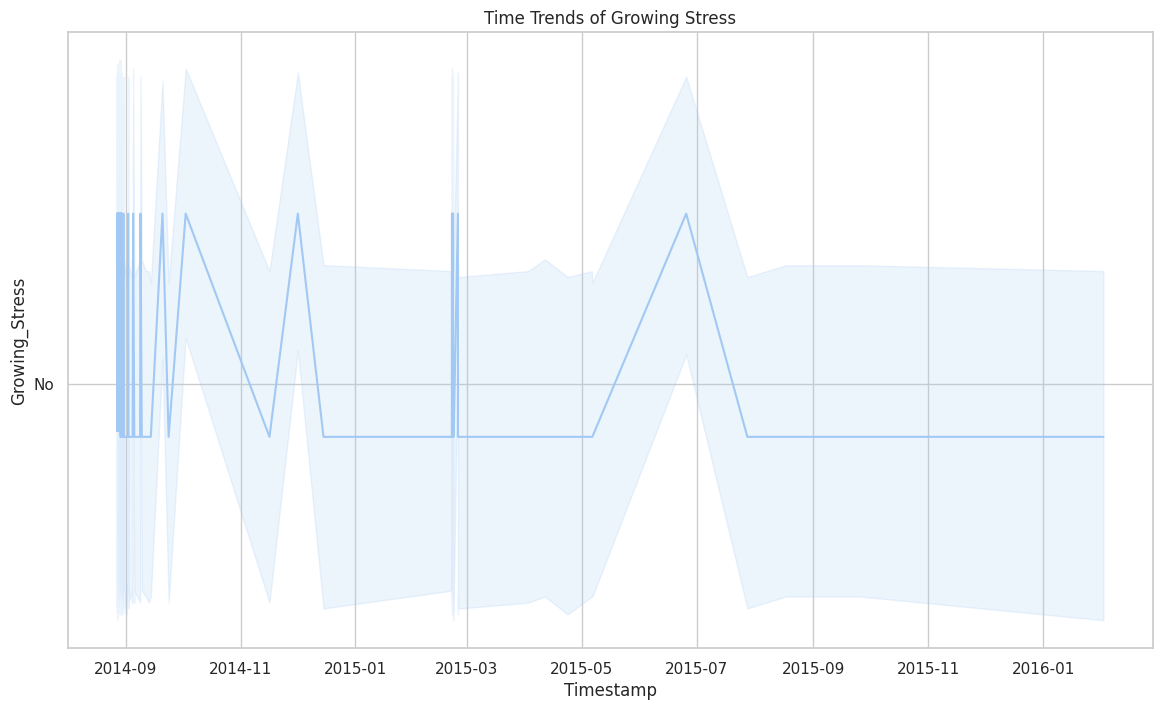

In [57]:
sns.set(style='whitegrid', palette='pastel')

# Time Trends (Timestamp)
plt.figure(figsize=(14, 8))
sns.lineplot(x='Timestamp', y='Growing_Stress', data=df)
plt.title('Time Trends of Growing Stress')
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


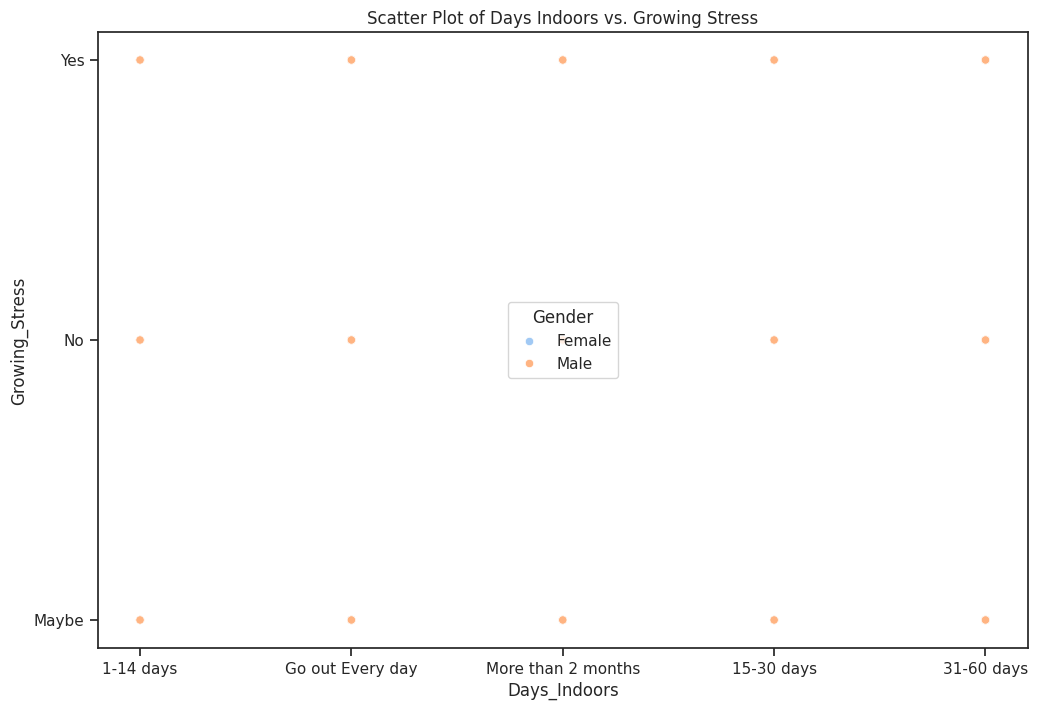

In [61]:
sns.set(style='ticks', palette='pastel')

#
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Days_Indoors', y='Growing_Stress', hue='Gender', data=df, palette='pastel')
plt.title('Scatter Plot of Days Indoors vs. Growing Stress')
plt.show()

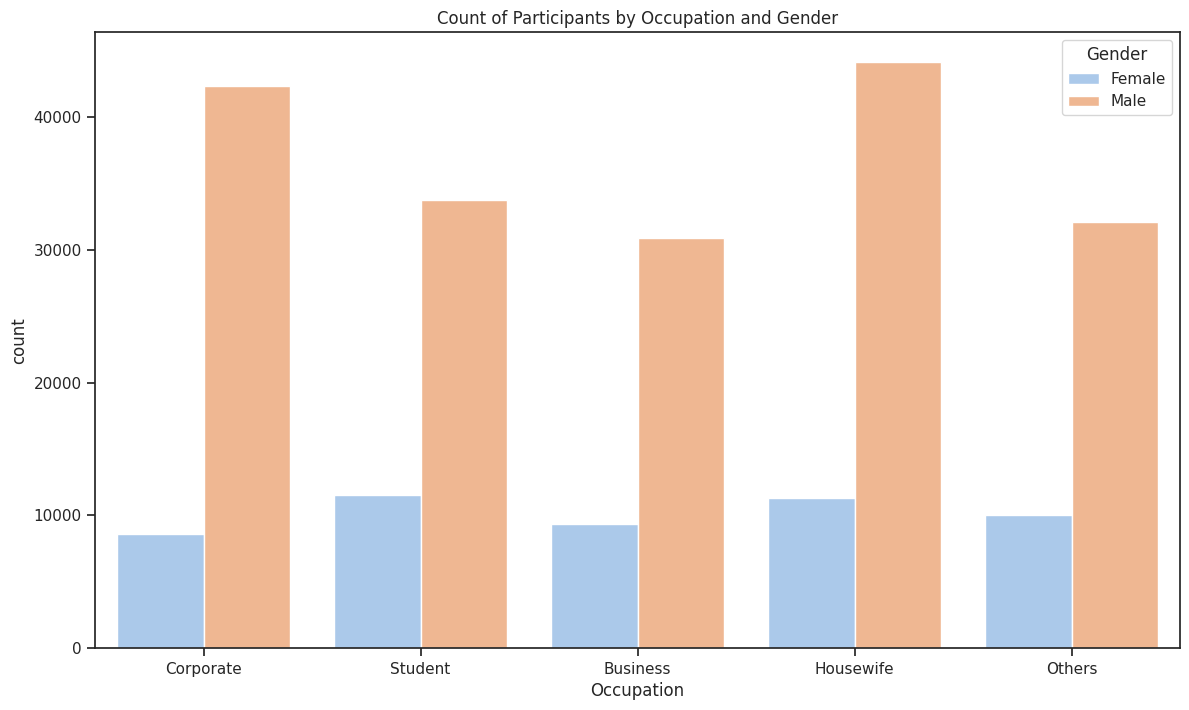

In [62]:
plt.figure(figsize=(14, 8))
sns.countplot(x='Occupation', hue='Gender', data=df, palette='pastel')
plt.title('Count of Participants by Occupation and Gender')
plt.show()